## Stable Diffusion Inpainting ##

Pretrained model: https://huggingface.co/runwayml/stable-diffusion-inpainting

In [15]:
import PIL
import torch

from diffusers import StableDiffusionInpaintPipeline

def load_image(path):
    return PIL.Image.open(path).convert("RGB")

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

unet\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


### Configure input file name here ###

In [16]:
filename = "fence"

Original image


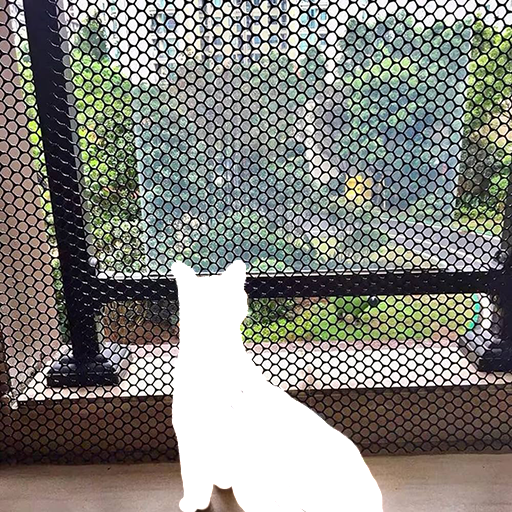

  0%|          | 0/50 [00:00<?, ?it/s]

Whole image result


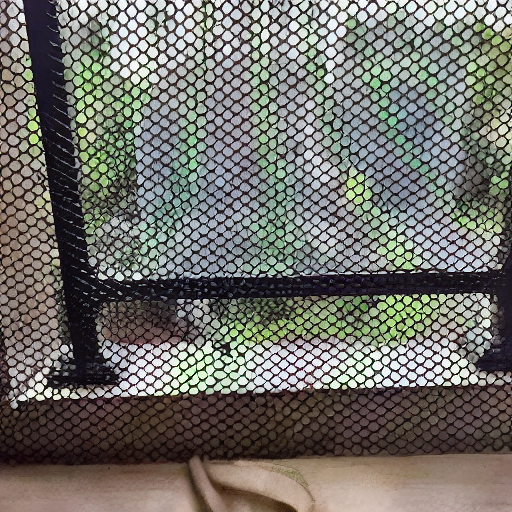

Masked area inpaint result


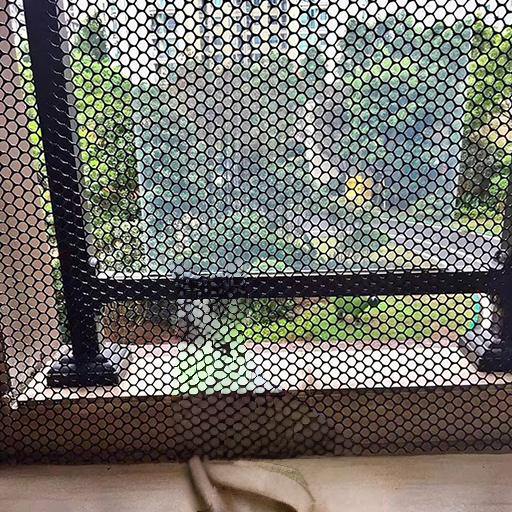

In [17]:
import math

# file input and output paths
image_file = f"examples/inpaint/testImages/{filename}.png"
mask_file = f"examples/inpaint/masks/{filename}_mask.png"

init_image = load_image(image_file)
mask_image = load_image(mask_file)

print("Original image")
display(init_image)

# model only accepts files with dimensions divisible by 8,
# upscale to nearest multiple of 8, and resize to original
# after inpainting
w, h = init_image.size
w_divisible = math.ceil(w/8)*8
h_divisible = math.ceil(h/8)*8

prompt = "fill background"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image, height=h_divisible, width=w_divisible).images[0]
image = image.resize((w, h))

print("Whole image result")
display(image)

# only use masked area of the inpainted output
init_image.paste(image, (0, 0), mask_image.convert("L"))

print("Masked area inpaint result")
display(init_image)

init_image.save(f"examples/inpaint/results_diffusion/{filename}.png")